### Customizing Plot Legends

• Plot legends give meaning to a visualization, assigning labels to the various plot elements.

• We previously saw how to create a simple legend; here we’ll take a look at customizing the placement and aesthetics of the legend in Matplotlib.

• The simplest legend can be created with the plt.legend() command, which automatically creates a legend for any labeled plot elements.

In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')

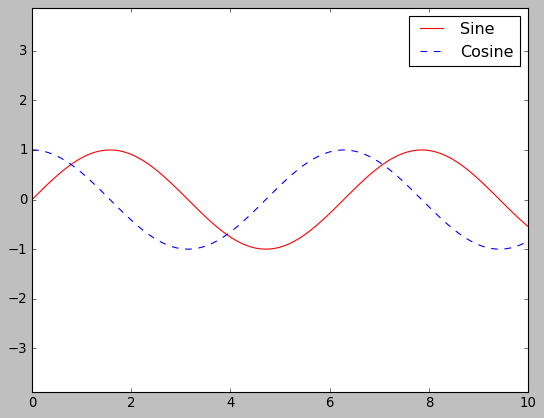

In [36]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-r', label = 'Sine')
ax.plot(x, np.cos(x), '--b', label = 'Cosine')
ax.axis('equal')
ax.legend();

• But there are many ways we might want to customize such a legend.

• For example, we can specify the location and turn off the frame.

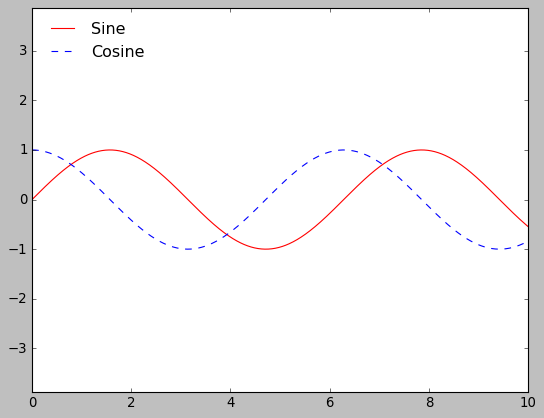

In [37]:
ax.legend(loc = 'upper left', frameon = False)
fig

• We can use the ncol command to specify the number of columns in the legend.

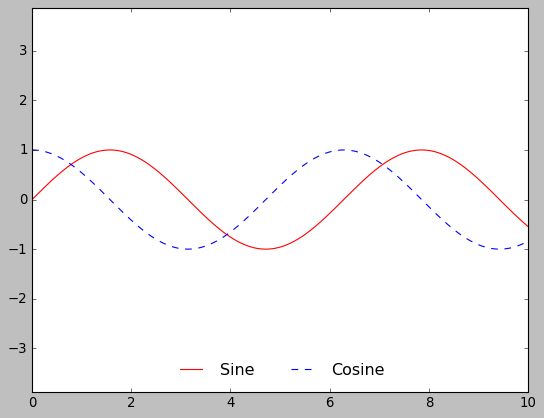

In [38]:
ax.legend(loc = 'lower center', frameon = False, ncol = 2)
fig

• We can use a rounded box ( fancybox ) or add a shadow, change the transparency (alpha value) of the frame, or change the padding around the text.

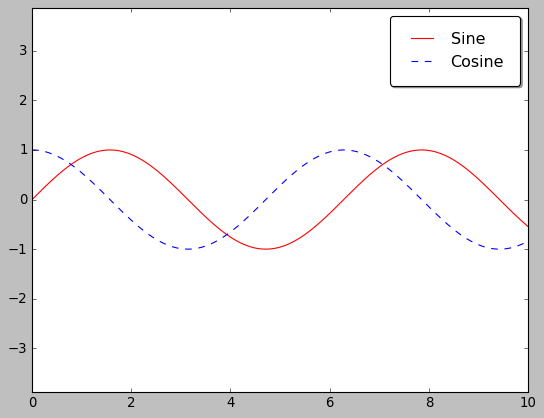

In [39]:
ax.legend(fancybox = True, framealpha = 1, shadow = True, borderpad = 1)
fig

### Choosing Elements for the Legend

• As we’ve already seen, the legend includes all labeled elements by default.

• If this is not what is desired, we can fine-tune which elements and labels appear in the legend by using the objects returned by plot commands.

• The plt.plot() command is able to create multiple lines at once, and returns a list of created line instances.

• Passing any of these to plt.legend() will tell it which to identify, along with the labels we’d like to specify.

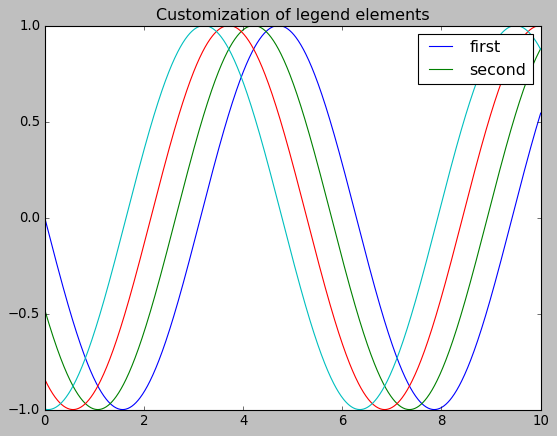

In [46]:
y = np.sin(x[:, np.newaxis] + np.pi + np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.title('Customization of legend elements')
plt.legend(lines[:2], ['first', 'second']);

• I generally find in practice that it is clearer to use the first method, applying labels to the plot elements you’d like to show on the legend

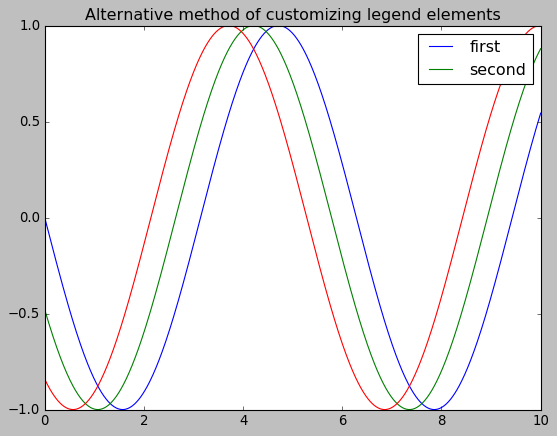

In [49]:
plt.plot(x, y[:, 0], label = 'first')
plt.plot(x, y[:, 1], label = 'second')
plt.plot(x, y[:, 2])
plt.title('Alternative method of customizing legend elements')
plt.legend(framealpha = 1, frameon = True);

### Legend for Size of Points

• Sometimes the legend defaults are not sufficient for the given visualization.

• For example, perhaps you’re using the size of points to mark certain features of the data, and want to create a legend reflecting this.

• Here is an example where we’ll use the size of points to indicate populations of California cities. 

• We’d like a legend that specifies the scale of the sizes of the points, and we’ll accomplish this by plotting some labeled data with no entries.

In [60]:
import pandas as pd
cities = pd.read_csv('california_cities.csv')
cities.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [64]:
# Extract the data we are interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

Text(0.5, 1.0, 'California Cities : Area & Population')

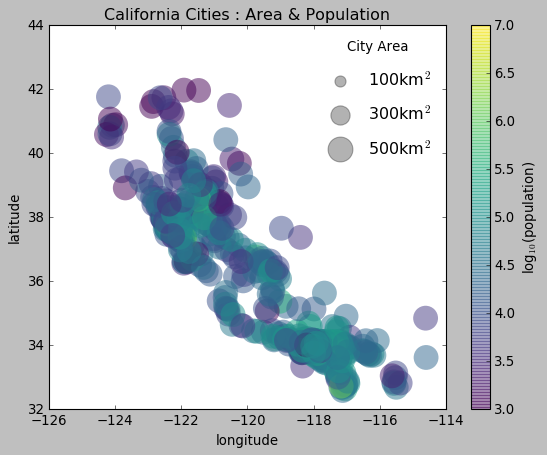

In [73]:
# Scatter the points, using color & size but no label
plt.scatter(lon, lat, label = None, c=np.log10(population), cmap='viridis', s=area, linewidths=0, alpha=0.5)
plt.axis(aspect = 'equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Here we will create legend:
# We'll plot empty lists with desired size & label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area, label=str(area) + 'km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')
plt.title('California Cities : Area & Population')

Multiple Legends

• Sometimes when designing a plot you’d like to add multiple legends to the same axes.

• Unfortunately, Matplotlib does not make this easy: via the standard legend interface it is only possible to create a single legend for the entire plot.

• If you try to create a second legend using plt.legend() or ax.legend() , it will simply override the first one.

• We can work around this by creating a new legend artist from scratch, and then using the lower-level ax.add_artist() method to manually add the second artist to the plot.

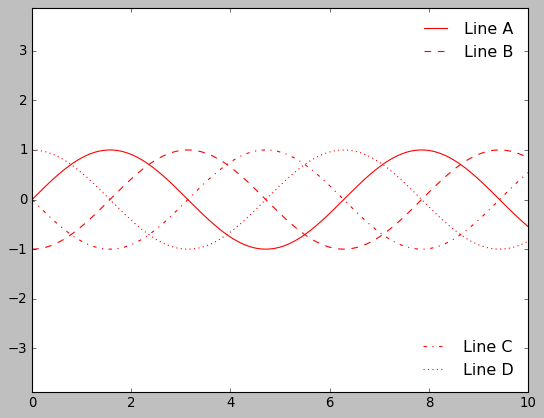

In [83]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2), styles[i], color='r')
ax.axis('equal')

# specify the lines & labels of the first legend
ax.legend(lines[:2], ['Line A', 'Line B'], loc = 'upper right', frameon = False)

# specify the lines & labels of the second legend
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['Line C', 'Line D'], loc = 'lower right', frameon = False)
ax.add_artist(leg);